In [7]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from math import cos, sin, atan

In [8]:
df = pd.read_csv('parkin_data/parkinsons.data')

In [9]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
#getting the feature and labels
features=df.loc[:,df.columns!='status'].values[:,1:] 
#we are ignoring status which is the result and the first column which are the signed name of the patients
labels=df.loc[:,'status'].values

In [11]:
scaler=MinMaxScaler((-1,1)) #normalizes the data which makes the model less bais
x=scaler.fit_transform(features)
# labels = to_categorical(df.status)
y=labels

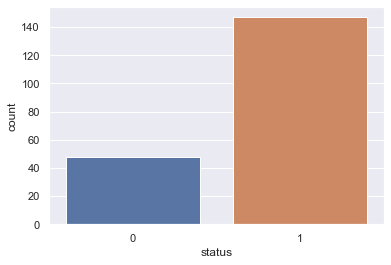

In [12]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="status", data=df)

In [13]:
print(df.describe())
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

In [14]:
n_cols = features.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_cols, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
# Define early_stopping_monitor --> basically stops the model for training if it sees accuracy is not increasing
#within three epoch
# early_stopping_monitor = EarlyStopping(patience=2)

# Train your model for 25 epochs
model_history = model.fit(x_train, y_train, epochs=30)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(x_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/30
5/5 [==============================] - 1s 9ms/step - loss: 0.6452 - accuracy: 0.6967
Epoch 2/30
5/5 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7530
Epoch 3/30
5/5 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.7587
Epoch 4/30
5/5 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.7516
Epoch 5/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.8100
Epoch 6/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8350
Epoch 7/30
5/5 [==============================] - 0s 4ms/step - loss: 0.4134 - accuracy: 0.8437
Epoch 8/30
5/5 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy: 0.8493
Epoch 9/30
5/5 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.8242
Epoch 10/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8268
Epoch 11/30
5/5 [======================

In [16]:
# plt.plot(accuracy.history['loss'])
# plt.xlabel('Epochs')
# plt.ylabel('Validation score')
# plt.show()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.predict(x_test)

array([[0.85380256],
       [0.7615607 ],
       [0.8773842 ],
       [0.98326063],
       [0.9981742 ],
       [0.99685436],
       [0.53269345],
       [0.9794272 ],
       [0.9932842 ],
       [0.99766296],
       [0.15212524],
       [0.85756886],
       [0.99938357],
       [0.42274767],
       [0.9527007 ],
       [0.9797802 ],
       [0.9801456 ],
       [0.0527178 ],
       [0.75102127],
       [0.99837255],
       [0.9732615 ],
       [0.98117036],
       [0.9475059 ],
       [0.9962039 ],
       [0.97587115],
       [0.9538631 ],
       [0.42775595],
       [0.7462305 ],
       [0.8955579 ],
       [0.99853337],
       [0.9997654 ],
       [0.98921657],
       [0.973516  ],
       [0.9864601 ],
       [0.8680643 ],
       [0.7620231 ],
       [0.99137414],
       [0.57978547],
       [0.95655775]], dtype=float32)

In [18]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 22) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense (None, 22) float32
dense_1 (None, 64) float32
dense_2 (None, 32) float32
dense_3 (None, 16) float32


[None, None, None, None]

In [14]:
#Dump Weights
for layerNum, layer in enumerate(model.layers):
    print('printing the values of layer number', layerNum)
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    
    for toNeuronNum, bias in enumerate(biases):
        print('printing biases')
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print('printing weight')
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

printing the values of layer number 0
printing biases
0B -> L1N0: -0.011389057151973248
printing biases
0B -> L1N1: 0.03622348979115486
printing biases
0B -> L1N2: -0.02688778005540371
printing biases
0B -> L1N3: -0.0008745236555114388
printing biases
0B -> L1N4: -0.036260489374399185
printing biases
0B -> L1N5: -0.022379491478204727
printing biases
0B -> L1N6: -0.0411478616297245
printing biases
0B -> L1N7: 0.06710266321897507
printing biases
0B -> L1N8: -0.0052715931087732315
printing biases
0B -> L1N9: 0.0462639294564724
printing biases
0B -> L1N10: 0.019869782030582428
printing biases
0B -> L1N11: -0.003912846092134714
printing biases
0B -> L1N12: 0.04539021477103233
printing biases
0B -> L1N13: 0.004896178375929594
printing biases
0B -> L1N14: 0.02561030350625515
printing biases
0B -> L1N15: -0.010260178707540035
printing biases
0B -> L1N16: 0.03787270188331604
printing biases
0B -> L1N17: -0.03614363074302673
printing biases
0B -> L1N18: -0.010723825544118881
printing biases
0B -

printing biases
1B -> L2N0: 0.0030067081097513437
printing biases
1B -> L2N1: 0.036678247153759
printing biases
1B -> L2N2: 0.0006589401746168733
printing biases
1B -> L2N3: -0.025342298671603203
printing biases
1B -> L2N4: 0.05668046325445175
printing biases
1B -> L2N5: -0.009366151876747608
printing biases
1B -> L2N6: -0.01019342802464962
printing biases
1B -> L2N7: 0.05790243297815323
printing biases
1B -> L2N8: 0.04803895577788353
printing biases
1B -> L2N9: -0.037062421441078186
printing biases
1B -> L2N10: 0.04231896996498108
printing biases
1B -> L2N11: -0.010002228431403637
printing biases
1B -> L2N12: 0.06286891549825668
printing biases
1B -> L2N13: 0.05241866782307625
printing biases
1B -> L2N14: -0.01850052922964096
printing biases
1B -> L2N15: 0.0675220638513565
printing biases
1B -> L2N16: 0.005181603133678436
printing biases
1B -> L2N17: 0.058842577040195465
printing biases
1B -> L2N18: 0.04768494889140129
printing biases
1B -> L2N19: -0.016446659341454506
printing biases

L1N43                   -> L2N13 = 0.06167034059762955
printing weight
L1N43                   -> L2N14 = -0.22750818729400635
printing weight
L1N43                   -> L2N15 = -0.05570394545793533
printing weight
L1N43                   -> L2N16 = 0.21051645278930664
printing weight
L1N43                   -> L2N17 = -0.1252734214067459
printing weight
L1N43                   -> L2N18 = -0.026763778179883957
printing weight
L1N43                   -> L2N19 = -0.19560088217258453
printing weight
L1N43                   -> L2N20 = -0.07015520334243774
printing weight
L1N43                   -> L2N21 = -0.08236991614103317
printing weight
L1N43                   -> L2N22 = 0.2514517605304718
printing weight
L1N43                   -> L2N23 = 0.011119270697236061
printing weight
L1N43                   -> L2N24 = -0.040563397109508514
printing weight
L1N43                   -> L2N25 = 0.07192040979862213
printing weight
L1N43                   -> L2N26 = -0.02331157773733139
printing wei

In [19]:
model.get_weights()

[array([[-0.06208139,  0.19290075, -0.22276871, ...,  0.14531508,
          0.11167568,  0.06966116],
        [-0.1513809 ,  0.13304292,  0.1524791 , ..., -0.02467878,
         -0.08905285,  0.23071033],
        [-0.03209457, -0.21881513,  0.14909388, ...,  0.24083248,
          0.00627523,  0.07605381],
        ...,
        [ 0.07244709, -0.23613857,  0.04139796, ...,  0.20856756,
         -0.18377437, -0.0233827 ],
        [-0.07847362,  0.01346488,  0.07676378, ...,  0.10865046,
          0.17629077,  0.24570982],
        [-0.02051564,  0.05715511, -0.24841806, ..., -0.07981625,
          0.11722884,  0.10391788]], dtype=float32),
 array([ 0.03186589, -0.00330582, -0.03050323,  0.04339134,  0.05750727,
         0.05804662, -0.01210249, -0.02710003,  0.01435949,  0.06580313,
         0.00358404, -0.02969074,  0.02728229,  0.06968488, -0.0263407 ,
         0.04234736,  0.0171486 ,  0.        , -0.01331561,  0.02220614,
         0.04895979,  0.05242484,  0.02669603,  0.03086523, -0.035